In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining a quadratic loss function
def quadratic_loss(x, y):
    return x**2 + 10 * y**2

In [3]:
# Gradient of the loss function
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [4]:
# BGD
def batch_gradient_descent(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
    
    return np.array(path), losses

In [5]:
# GD with momentum
def gradient_descent_momentum(grad_func, eta, beta, epochs, start_point):
    x, y = start_point
    v = np.array([0, 0])
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        v = beta * v + (1 - beta) * grad
        x -= eta * v[0]
        y -= eta * v[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [6]:
# Visualization function for paths
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)
    
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')
    
    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', label='Start')
        plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [8]:
# Visualization function for losses
def plot_losses(losses, labels, title):
    plt.figure(figsize=(8, 6))
    
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [30]:
# Params
eta_bgd = 0.1   # Learning rate for BGD
eta_momentum = 0.1  # Learning rate for momentum
beta = 0.9  # Momentum coeff
epochs = 50
start_point = (1.5, 1.5)    # Initial point far from the minimum

In [31]:
# Run optimizations
path_bgd, losses_bgd = batch_gradient_descent(quadratic_grad, eta_bgd, epochs, start_point)
path_momentum, losses_momentum = gradient_descent_momentum(quadratic_grad, eta_momentum, beta, epochs, start_point)

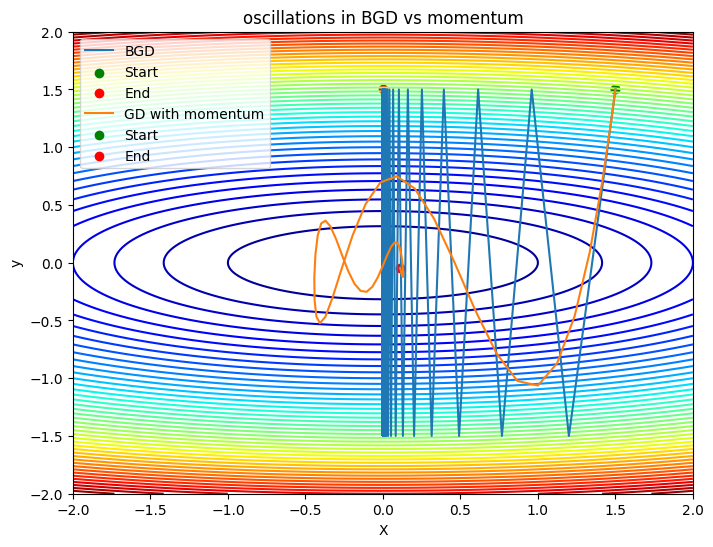

In [33]:
# Plot results 
plot_paths(quadratic_loss, [path_bgd, path_momentum], ["BGD", "GD with momentum"], "oscillations in BGD vs momentum")

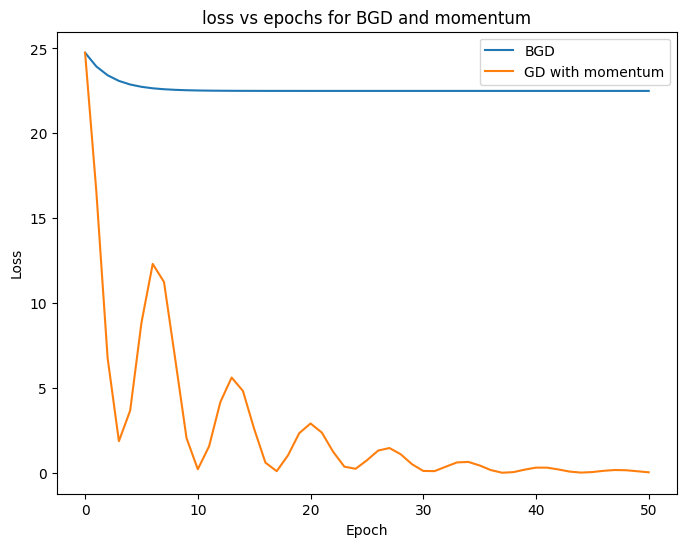

In [34]:
# Plot losses
plot_losses([losses_bgd, losses_momentum], ["BGD", "GD with momentum"], "loss vs epochs for BGD and momentum")